In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import shapiro
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import seaborn as sns

**LEO EL ARCHIVO DE "LISTINGS.CSV"**





In [ ]:
data = pd.read_csv('listings.csv', encoding='latin-1')

**Etapa 2: Extracción, limpieza y transformación**

In [ ]:
data.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,35797,https://www.airbnb.com/rooms/35797,20250625031918,2025-06-26,city scrape,Villa Dante,"Dentro de Villa un estudio de arte con futon, ...","Santa Fe Shopping Mall, Interlomas Park and th...",https://a0.muscache.com/pictures/f395ab78-1185...,153786,...,NaN,NaN,NaN,NaN,f,1,1,0,0,NaN
1,44616,https://www.airbnb.com/rooms/44616,20250625031918,2025-07-01,city scrape,Condesa Haus,A new concept of hosting in mexico through a b...,NaN,https://a0.muscache.com/pictures/251410/ec75fe...,196253,...,4.78,4.98,4.47,NaN,f,9,4,2,0,0.39
2,56074,https://www.airbnb.com/rooms/56074,20250625031918,2025-07-01,city scrape,Great space in historical San Rafael,This great apartment is located in one of the ...,Very traditional neighborhood with all service...,https://a0.muscache.com/pictures/3005118/60dac...,265650,...,4.94,4.76,4.79,NaN,f,1,1,0,0,0.48
3,67703,https://www.airbnb.com/rooms/67703,20250625031918,2025-07-01,city scrape,"2 bedroom apt. deco bldg, Condesa","Comfortably furnished, sunny, 2 bedroom apt., ...",NaN,https://a0.muscache.com/pictures/3281720/6f078...,334451,...,4.92,4.98,4.92,NaN,f,2,2,0,0,0.30
4,70644,https://www.airbnb.com/rooms/70644,20250625031918,2025-07-01,city scrape,Beautiful light Studio Coyoacan- full equipped !,COYOACAN designer studio quiet & safe! well eq...,Coyoacan is a beautiful neighborhood famous fo...,https://a0.muscache.com/pictures/f397d2da-d045...,212109,...,4.98,4.96,4.92,NaN,f,3,2,1,0,0.81


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26401 entries, 0 to 26400
Data columns (total 79 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            26401 non-null  int64  
 1   listing_url                                   26401 non-null  object 
 2   scrape_id                                     26401 non-null  int64  
 3   last_scraped                                  26401 non-null  object 
 4   source                                        26401 non-null  object 
 5   name                                          26401 non-null  object 
 6   description                                   25633 non-null  object 
 7   neighborhood_overview                         13970 non-null  object 
 8   picture_url                                   26401 non-null  object 
 9   host_id                                       26401 non-null 

Empecamos con 79 columnas y 26401 datos maximos. Podemos apreciar columnas sin datos, varios datos faltantes y varias columnas que no nos sirven para nuestro analísis.

In [ ]:
data.price.isnull().sum()

np.int64(3274)

3274 datos faltantes en "price" la variable mas importante.

**Borramos los 3 datos nulos**

In [ ]:
data.dropna(subset=["price"], inplace=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23127 entries, 0 to 26400
Data columns (total 79 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            23127 non-null  int64  
 1   listing_url                                   23127 non-null  object 
 2   scrape_id                                     23127 non-null  int64  
 3   last_scraped                                  23127 non-null  object 
 4   source                                        23127 non-null  object 
 5   name                                          23127 non-null  object 
 6   description                                   22538 non-null  object 
 7   neighborhood_overview                         12293 non-null  object 
 8   picture_url                                   23127 non-null  object 
 9   host_id                                       23127 non-null  int6

Tenemos datos cuantitativos y cualitativo. Dentro de los cuantitativos tenemos "int64" (enteros) y float64 "pueden tener decimales". Por otro lado, las variables "object" pueden ser tanto cuantitativo o cualitativo dependiendo como escribieron la variable. En caso de que tenga que ser cuantitativo y es cualitativo se puede cambiar o se puede sacar información de ese texto "object" y pasarlo a otra columna númerica como información.


**CHECAMOS DUPLICADOS**

In [ ]:
duplicados=data.duplicated().sum()
duplicados

np.int64(0)

**NO HAY DUPLICADOS**

**BORRAMOS COLUMNAS SIN DATOS**

In [ ]:
del data['license']
del data['neighbourhood_group_cleansed']
del data['calendar_updated']
del data['neighbourhood']

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23127 entries, 0 to 26400
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            23127 non-null  int64  
 1   listing_url                                   23127 non-null  object 
 2   scrape_id                                     23127 non-null  int64  
 3   last_scraped                                  23127 non-null  object 
 4   source                                        23127 non-null  object 
 5   name                                          23127 non-null  object 
 6   description                                   22538 non-null  object 
 7   neighborhood_overview                         12293 non-null  object 
 8   picture_url                                   23127 non-null  object 
 9   host_id                                       23127 non-null  int6

In [ ]:
del data['id']
del data['picture_url']
del data['listing_url']
del data['last_scraped']
del data['host_id']
del data['scrape_id']
del data['host_url']
del data['host_since']
del data['host_location']
del data['host_response_time']
del data['host_response_rate']
del data['host_acceptance_rate']
del data['host_thumbnail_url']
del data['host_picture_url']
del data['host_neighbourhood']
del data['host_verifications']
del data['host_has_profile_pic']
del data['host_identity_verified']
del data['has_availability']
del data['availability_30']
del data['availability_60']
del data['availability_90']
del data['first_review']
del data['last_review']
del data['instant_bookable']
del data['review_scores_accuracy']
del data['review_scores_cleanliness']
del data['review_scores_checkin']
del data['review_scores_communication']
del data['review_scores_location']
del data['review_scores_value']
del data['reviews_per_month']

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23127 entries, 0 to 26400
Data columns (total 43 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   source                                        23127 non-null  object 
 1   name                                          23127 non-null  object 
 2   description                                   22538 non-null  object 
 3   neighborhood_overview                         12293 non-null  object 
 4   host_name                                     22295 non-null  object 
 5   host_about                                    13518 non-null  object 
 6   host_is_superhost                             21908 non-null  object 
 7   host_listings_count                           22240 non-null  float64
 8   host_total_listings_count                     22240 non-null  float64
 9   neighbourhood_cleansed                        23127 non-null  obje

In [ ]:
del data['host_is_superhost']
del data['host_listings_count']
del data['minimum_minimum_nights']
del data['maximum_minimum_nights']
del data['minimum_maximum_nights']
del data['maximum_maximum_nights']

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23127 entries, 0 to 26400
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   source                                        23127 non-null  object 
 1   name                                          23127 non-null  object 
 2   description                                   22538 non-null  object 
 3   neighborhood_overview                         12293 non-null  object 
 4   host_name                                     22295 non-null  object 
 5   host_about                                    13518 non-null  object 
 6   host_total_listings_count                     22240 non-null  float64
 7   neighbourhood_cleansed                        23127 non-null  object 
 8   latitude                                      23127 non-null  float64
 9   longitude                                     23127 non-null  floa

Para datos faltantes pusimos "Not provided" en columnas específicas.

In [ ]:
cols_texto = [
    'description', 'neighborhood_overview', 'host_name',
    'host_about', 'bathrooms_text'
]

for col in cols_texto:
    data[col] = data[col].fillna("Not provided")


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23127 entries, 0 to 26400
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   source                                        23127 non-null  object 
 1   name                                          23127 non-null  object 
 2   description                                   23127 non-null  object 
 3   neighborhood_overview                         23127 non-null  object 
 4   host_name                                     23127 non-null  object 
 5   host_about                                    23127 non-null  object 
 6   host_total_listings_count                     22240 non-null  float64
 7   neighbourhood_cleansed                        23127 non-null  object 
 8   latitude                                      23127 non-null  float64
 9   longitude                                     23127 non-null  floa

Extraemos información importante de la columna "bathrooms_text" para poder completar datos faltantes en la columna "bathrooms".

In [ ]:
import re

def extract_bathrooms(text):
    if pd.isna(text):
        return None
    match = re.search(r"(\d+\.?\d*)", text)
    if match:
        return float(match.group(1))
    return None

data['bathrooms_parsed'] = data['bathrooms_text'].apply(extract_bathrooms)

# Usar bathrooms_parsed para rellenar bathrooms
data['bathrooms'] = data['bathrooms'].fillna(data['bathrooms_parsed'])

# Si todavía quedan NaN → llenar con mediana
data['bathrooms'] = data['bathrooms'].fillna(data['bathrooms'].median())

data.drop(columns=['bathrooms_parsed'], inplace=True)


Llenamos otros datos daltantes con diferentes técnicas. Por ejemplo: Con la variable "bedrooms" y "beds"llenamos con la mediana.

In [ ]:
data['bedrooms'] = data.groupby('neighbourhood_cleansed')['bedrooms'].transform(
    lambda x: x.fillna(x.median())
)

data['bedrooms'] = data['bedrooms'].fillna(data['bedrooms'].median())


In [ ]:
data['beds'] = data['beds'].fillna(data['bedrooms'])
data['beds'] = data['beds'].fillna(data['beds'].median())


In [ ]:
data['host_total_listings_count'] = data['host_total_listings_count'].fillna(
    data['host_total_listings_count'].median()
)


In [ ]:
data['review_scores_rating'] = data.groupby('neighbourhood_cleansed')['review_scores_rating'].transform(
    lambda x: x.fillna(x.median())
)

data['review_scores_rating'] = data['review_scores_rating'].fillna(
    data['review_scores_rating'].median()
)


In [ ]:
data['calendar_last_scraped'] = pd.to_datetime(data['calendar_last_scraped'])


In [ ]:
data.isna().sum()

,0
source,0
name,0
description,0
neighborhood_overview,0
host_name,0
host_about,0
host_total_listings_count,0
neighbourhood_cleansed,0
latitude,0
longitude,0


In [ ]:
data["bathrooms"].value_counts()

,count
bathrooms,
1.0,14997
2.0,4226
1.5,1551
2.5,766
3.0,544
3.5,230
4.0,220
0.0,125
4.5,104


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23127 entries, 0 to 26400
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype         
---  ------                                        --------------  -----         
 0   source                                        23127 non-null  object        
 1   name                                          23127 non-null  object        
 2   description                                   23127 non-null  object        
 3   neighborhood_overview                         23127 non-null  object        
 4   host_name                                     23127 non-null  object        
 5   host_about                                    23127 non-null  object        
 6   host_total_listings_count                     23127 non-null  float64       
 7   neighbourhood_cleansed                        23127 non-null  object        
 8   latitude                                      23127 non-null  float64  

In [ ]:
data["calendar_last_scraped"].value_counts()

,count
calendar_last_scraped,
2025-07-01,6854
2025-06-27,5265
2025-06-26,3319
2025-07-02,2381
2025-06-28,1912
2025-06-30,1265
2025-06-25,1115
2025-06-29,1016


En esta etapa se limpió la base de datos por completo, dejando todas las variables con el mismo número de datos. Se borraron las columnas innecesarias y se llenaron datos faltantes mediante la mediana o información de otra columna (como en bathrooms).Todas las variables estan listas para modelar una regresión y realizar gráficas.

**Etapa** 3


In [ ]:
data.shape

(23127, 37)

In [ ]:
data.describe()

,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,minimum_nights,maximum_nights,minimum_nights_avg_ntm,...,number_of_reviews_l30d,availability_eoy,number_of_reviews_ly,estimated_occupancy_l365d,estimated_revenue_l365d,review_scores_rating,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms
count,23127.000000,23127.000000,23127.000000,23127.000000,23127.000000,23127.000000,23127.000000,23127.000000,23127.000000,23127.000000,...,23127.000000,23127.000000,23127.000000,23127.000000,2.312700e+04,23127.000000,23127.000000,23127.000000,23127.000000,23127.000000
mean,35.005491,19.406468,-99.165347,3.370000,1.450253,1.528992,1.952350,3.877330,488.838155,3.563056,...,1.101310,136.216933,14.938340,92.654343,1.300932e+05,4.762840,15.841268,12.827777,2.741125,0.233147
min,1.000000,19.177848,-99.339630,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000e+00,1.000000,1.000000,0.000000,0.000000,0.000000
25%,2.000000,19.395013,-99.178300,2.000000,1.000000,1.000000,1.000000,1.000000,180.000000,1.000000,...,0.000000,105.000000,0.000000,6.000000,6.840000e+03,4.730000,1.000000,1.000000,0.000000,0.000000
50%,6.000000,19.415451,-99.167260,2.000000,1.000000,1.000000,1.000000,2.000000,365.000000,2.000000,...,0.000000,158.000000,6.000000,60.000000,5.796000e+04,4.830000,4.000000,2.000000,0.000000,0.000000
75%,18.000000,19.432254,-99.153978,4.000000,2.000000,2.000000,2.000000,2.000000,1120.000000,2.300000,...,2.000000,180.000000,22.000000,168.000000,1.751805e+05,4.930000,12.000000,7.000000,2.000000,0.000000
max,946.000000,19.549060,-98.966450,16.000000,49.000000,50.000000,50.000000,729.000000,1125.000000,729.000000,...,106.000000,190.000000,549.000000,255.000000,1.080000e+07,5.000000,235.000000,235.000000,70.000000,30.000000
std,119.586107,0.041457,0.033263,2.357602,1.033869,1.216194,1.754345,18.398414,397.887060,16.531031,...,2.182395,54.738672,22.215022,91.566019,2.316330e+05,0.348733,35.138272,34.744822,7.516344,2.171821


Apreciamos cuantos datos tienen las variables,la media, el mínimo, el máximo y los cuartiles de cada variable.

In [ ]:
data.dtypes

,0
source,object
name,object
description,object
neighborhood_overview,object
host_name,object
host_about,object
host_total_listings_count,float64
neighbourhood_cleansed,object
latitude,float64
longitude,float64


In [ ]:
data.isna().sum()

,0
source,0
name,0
description,0
neighborhood_overview,0
host_name,0
host_about,0
host_total_listings_count,0
neighbourhood_cleansed,0
latitude,0
longitude,0


Convertimos el precio a una variable cuantitativa, quitandole signos y comas que no permiten que sea cuantitativa.

In [ ]:
# Limpiar y convertir price a float
data["price"] = (
    data["price"].astype(str)
    .str.replace("$", "", regex=False)
    .str.replace(",", "", regex=False)
    .astype(float)
)

# Checar rápido
data["price"].head()
data["price"].describe()

,price
count,23127.000000
mean,1989.292472
std,18500.684915
min,66.000000
25%,630.000000
50%,1039.000000
75%,1647.000000
max,900000.000000


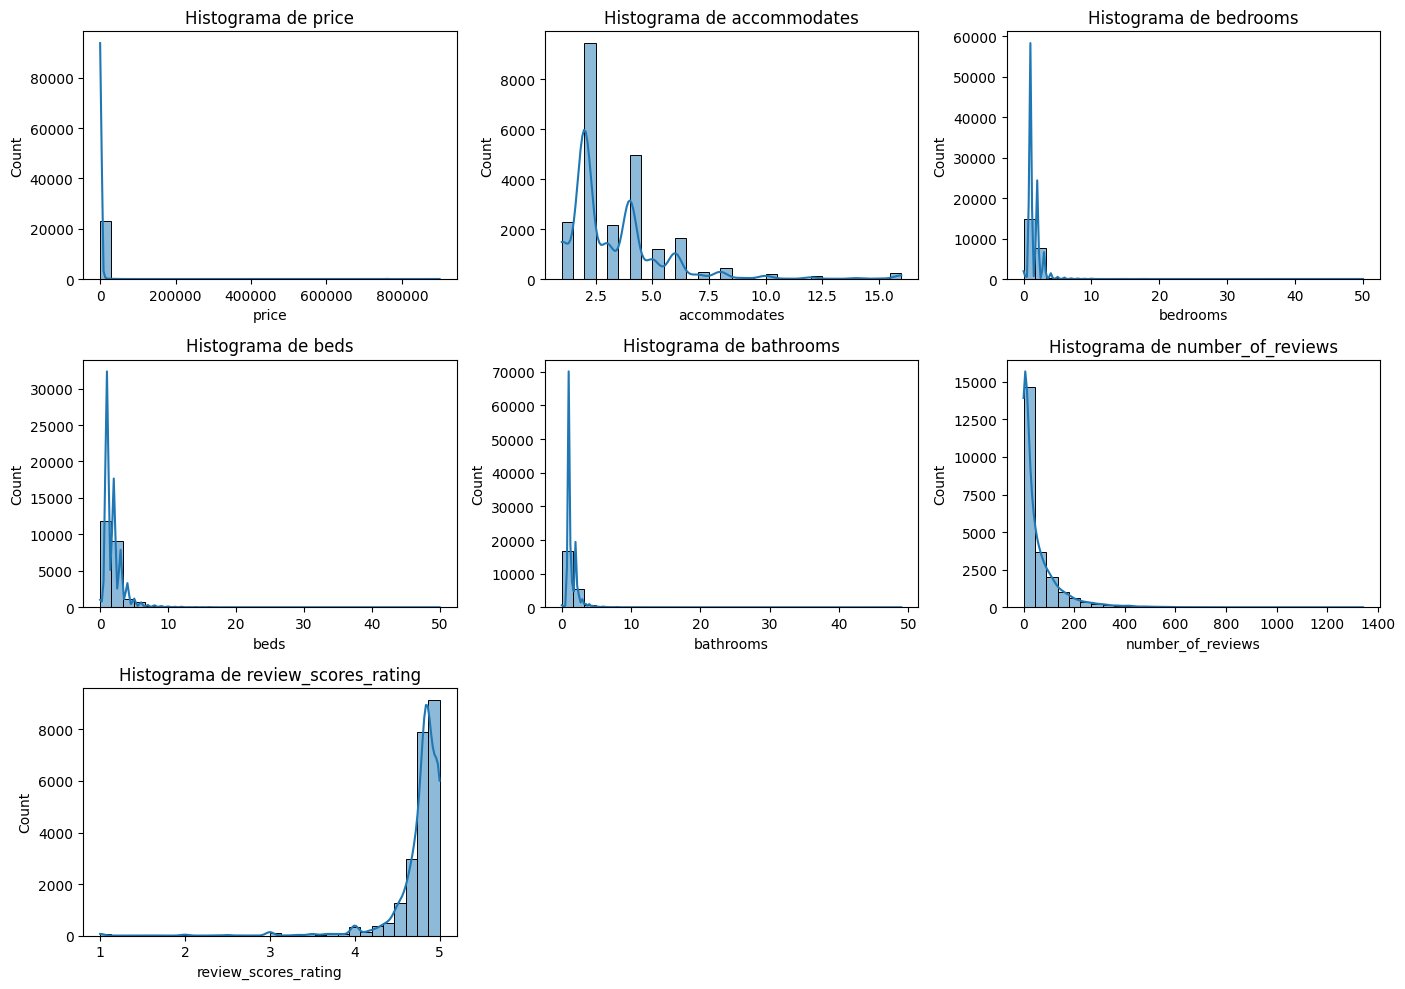

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

variables = ["price", "accommodates", "bedrooms", "beds",
             "bathrooms", "number_of_reviews", "review_scores_rating"]

plt.figure(figsize=(14,10))
for i, var in enumerate(variables, 1):
    plt.subplot(3, 3, i)
    sns.histplot(data[var], kde=True, bins=30)
    plt.title(f"Histograma de {var}")
plt.tight_layout()
plt.show()


Diferentes histogramas que demuestran el comportamiento de diferentes variables. Podemos apreciar que el único que tiene un sesgo a la izquierda es la variable "review_scores_rating" por otro lado, todas las otras variables muestran un sesgo a la derecha.

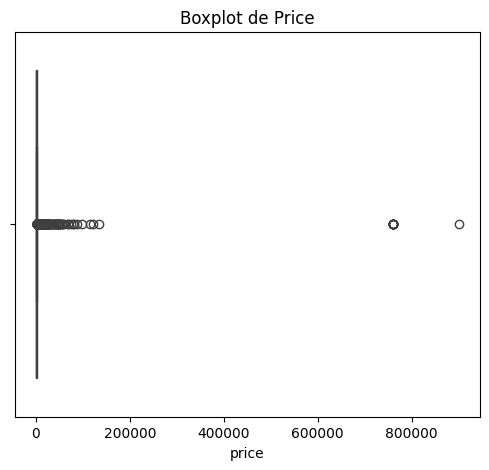

In [ ]:
plt.figure(figsize=(6,5))
sns.boxplot(x=data["price"])
plt.title("Boxplot de Price")
plt.show()


El comportamiento del precio esta mayormente por debajo de 200,000 con dos outliers pasando 600,000.

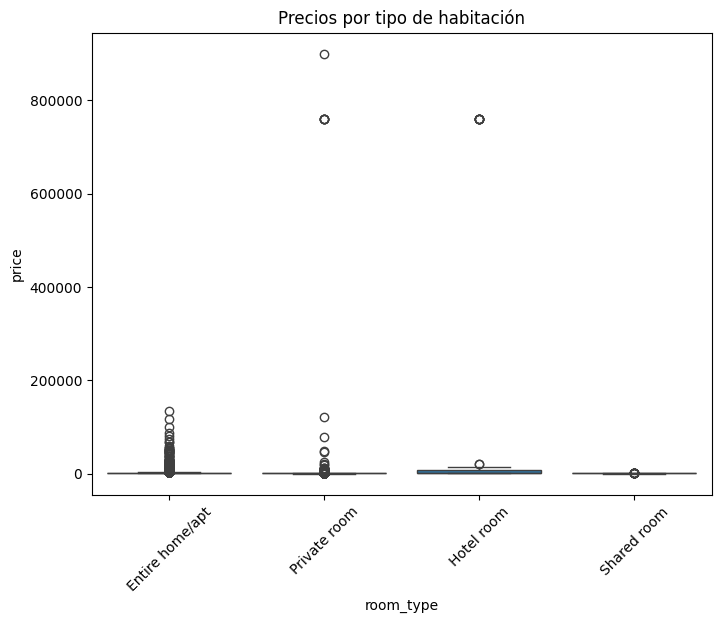

In [ ]:
plt.figure(figsize=(8,6))
sns.boxplot(x="room_type", y="price", data=data)
plt.title("Precios por tipo de habitación")
plt.xticks(rotation=45)
plt.show()


Con estas gráficas boxplot podemos apreciar que todas menos "shared room" tienen outliers. La variable "Entire home/ apt" cuanta con varios outliers pero todos estan muy cerca estando por debajo de la marca de 200,000. Por otro lado, las variables de "private room" y "hotel room" cuantan con al menos un outlier que ronda por arriba de los 600,000.

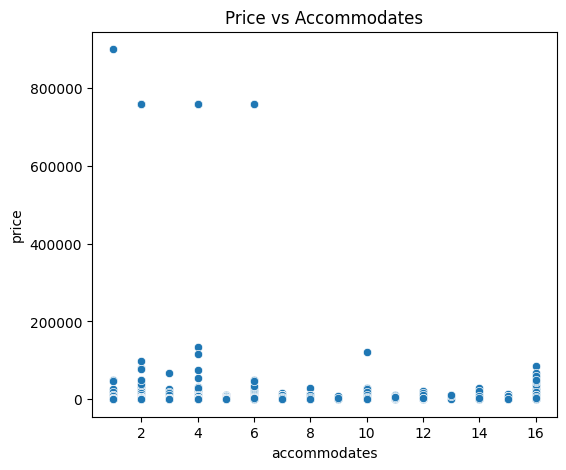

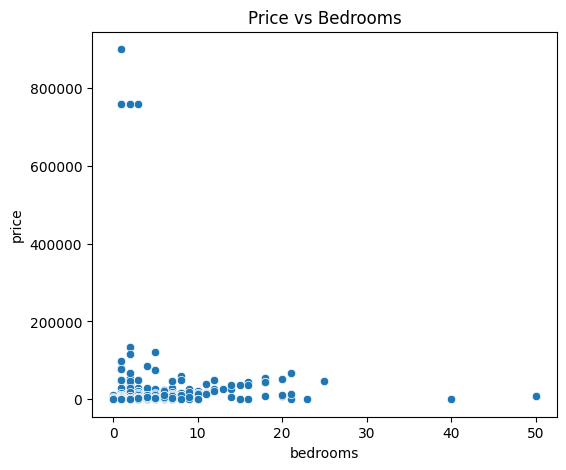

In [ ]:
plt.figure(figsize=(6,5))
sns.scatterplot(x="accommodates", y="price", data=data)
plt.title("Price vs Accommodates")
plt.show()

plt.figure(figsize=(6,5))
sns.scatterplot(x="bedrooms", y="price", data=data)
plt.title("Price vs Bedrooms")
plt.show()


Estos diagramas de dispersión son muy útiles para ver la relación entre dos variables. Con el primero podemos apreciar que no necesariamente crece el precio conforme van creciendo los "accommodates" aunque pareciera que al final con 16 "accommodates" da un pequeño salto.
En cuanto a la relación de bedrooms y price, apreciamos que con la mayoría de los datos acaba con un máximo de casi 30 "bedrooms" si se puede apreciar una leve subida e precio dependiendo la cantidad de camas pero igulmente con datos menores a 10 camas se pueden ver precios incluso mas altos a los que tienen mas de 15 camas.

In [ ]:
data["price"].value_counts()

,count
price,
450.0,148
900.0,114
855.0,97
600.0,97
1200.0,95
...,...
2837.0,1
10850.0,1
3485.0,1


In [ ]:
data["price"].dtype


dtype('float64')

In [ ]:
Q1 = data["price"].quantile(0.25)
Q3 = data["price"].quantile(0.75)
IQR = Q3 - Q1

lim_inf = Q1 - 1.5 * IQR
lim_sup = Q3 + 1.5 * IQR

data = data[(data["price"] >= lim_inf) & (data["price"] <= lim_sup)]
print(lim_inf)
print(lim_sup)

-895.5
3172.5


Para mejorar el modelo, eliminé valores atípicos del precio usando el método IQR (Rango Intercuartílico)

Dataset

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import pandas as pd



In [ ]:
numeric_vars = [
    "accommodates",
    "bedrooms",
    "beds",
    "bathrooms",
    "minimum_nights",
    "availability_365",
    "number_of_reviews",
    "review_scores_rating"
]

categorical_vars = [
    "property_type",
    "room_type",
    "neighbourhood_cleansed"
]

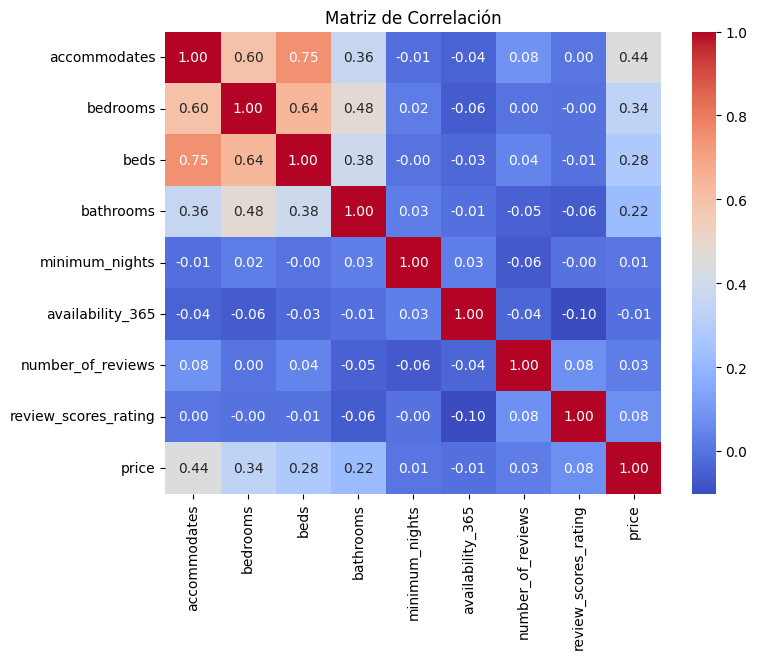

In [ ]:
corr = data[numeric_vars + ["price"]].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlación")
plt.show()


Mediante este diagrama podemos apreciar que variables podrían ser utiles para la regresión lineal. Normalmente las que tienen un valor mas alto sin importar el signo podrían ayudar a crear una buena regresión lineal. Como estamos haciendo para precio, acommodates, bedrooms, beds y bathrooms sí ayudan al modelo.

In [ ]:
numeric_vars = [c for c in numeric_vars if c in data.columns]
categorical_vars = [c for c in categorical_vars if c in data.columns]

all_vars = numeric_vars + categorical_vars

In [ ]:
df = data[["price"] + all_vars].dropna()

X = df[all_vars]
y = df["price"]

In [ ]:
X = pd.get_dummies(X, columns=categorical_vars, drop_first=True)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=0.7, test_size=0.3, random_state=42
)

La regresión se entrena con 70% de los datos y se prueba con el 30% faltante.

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)

**Modelo creado**

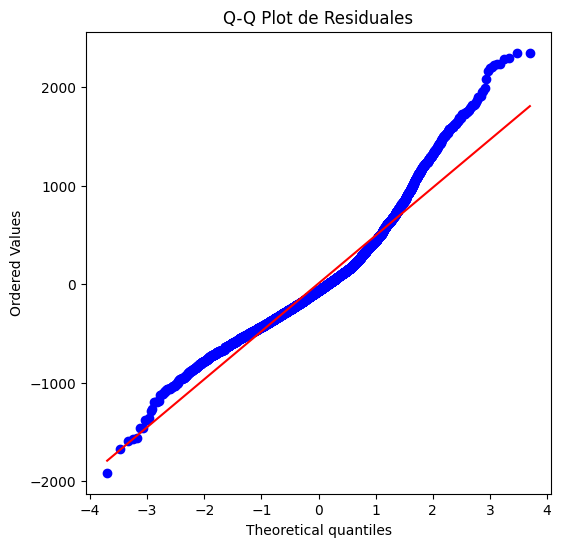

In [ ]:
import scipy.stats as stats
import matplotlib.pyplot as plt

# Calcular residuales
residuals = y_test - y_pred

# Q-Q Plot
plt.figure(figsize=(6,6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Q-Q Plot de Residuales")
plt.show()


Gráfica que demuestra el comportamieno de nuestro modelo.

In [ ]:
print("R²:", r2)

R²: 0.404691328357521


Con nuestro modelo se obtuvo una R² con los diferentes variables numpericos y categóricos.

Variables númericos:


*   "accommodates"
*   "bedrooms"
*   "beds"
*   "bathrooms"
*   "minimum_nights"
*   "availability_365"
*   "number_of_reviews"
*   "review_scores_rating"

Variables categóricos:

*   "property_type"
*   "room_type"
*   "neighbourhood_cleansed"









In [ ]:
# Intercepto
b0 = model.intercept_
print("b0 (intercept):", b0)

# Coeficientes
print("Coefficients from model.coef_:")
print(model.coef_)

# Número de coeficientes
print("Number of coefficients:", len(model.coef_))

# Coeficientes con nombres de variables
coef_table = pd.DataFrame({
    "variable": X.columns,
    "coef": model.coef_
})

print("\nCoeficientes por variable:")
print(coef_table)




b0 (intercept): -782.2537589167473
Coefficients from model.coef_:
[ 1.01735931e+02  6.63591363e+01 -4.58962386e+01  8.64329470e+01
 -3.33772560e-01  2.82823359e-01 -4.14499711e-01  1.34902770e+02
  8.34256310e+02  1.93727322e+03  4.86622132e+02  4.38050153e+01
  6.35758260e+02  7.69589236e+02  6.62547606e+02  5.72539154e+02
  3.26609661e+02  3.06299476e+02  1.81897790e+02  6.80457189e+02
  1.48835934e+03 -2.17710294e-11  5.08360221e+02  7.31869708e+02
  6.09776607e+02  6.07864590e+02  6.34967312e+02  5.61595014e+02
  5.90670948e+02  1.86758187e+02  7.13269108e+02  3.63948189e+02
  2.25564866e+02  4.10886091e+02  5.45018130e+02  2.50827456e+02
  3.52674472e+02  2.28247319e+02  7.05131359e+02  6.99113069e+02
 -3.41060513e-13  3.36379561e+02  1.21025246e+02  2.41055892e+02
  4.36739048e+02  1.21502115e+03  1.72255964e+02  3.29782688e+02
 -2.04636308e-12  4.52731705e+02  2.12363521e+02 -3.59431505e+01
  2.82206036e+02  4.05706659e+02  1.62503413e+03  1.88104763e+02
  4.70152835e+02  3.4907

In [ ]:
residuals = y_test - y_pred


**Histograma de residuales del modelo.**

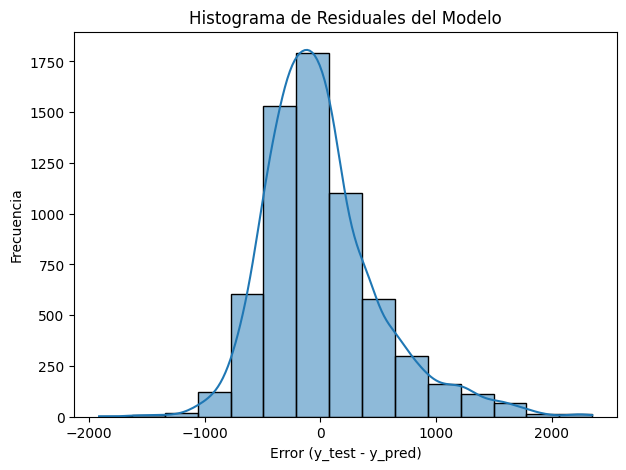

In [ ]:
plt.figure(figsize=(7,5))
sns.histplot(residuals, bins=15, kde=True)
plt.title('Histograma de Residuales del Modelo')
plt.xlabel('Error (y_test - y_pred)')
plt.ylabel('Frecuencia')
plt.show()


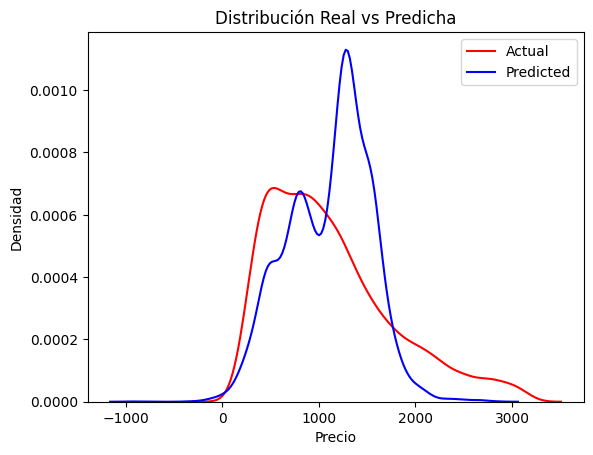

In [ ]:
ax1 = sns.kdeplot(y_test, color="r", label="Actual")
sns.kdeplot(y_pred, color="b", label="Predicted", ax=ax1)

plt.title("Distribución Real vs Predicha")
plt.xlabel("Precio")
plt.ylabel("Densidad")
plt.legend()
plt.show()


El modelo de regresión lineal logró explicar una parte  de la variabilidad del precio, especialmente después de eliminar mediante IQR, lo que mejoró el R² a aproximadamente 0.40. Aun presenta limitaciones debido a la dispersión del precio en Airbnb. Aun así, el modelo funciona como una herramienta inicial para estimar precios y entender qué variables tienen mayor impacto en ellos.

## Modelo predictivo Uniandes

### Pregunta 1

In [ ]:
#Librerias
import mlflow
import mlflow.tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [ ]:
# Escalar datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Activa el autolog de TensorFlow
mlflow.tensorflow.autolog(log_models=False)

#Crear funcion para poder iterar con los experimentos
def entrenar_modelo(neuronas_capa1, neuronas_capa2, learning_rate,
                    epochs, batch_size, activacion, nombre_run):

    with mlflow.start_run(run_name=nombre_run):

        # Hiperparámetros
        mlflow.log_param("neuronas_capa1", neuronas_capa1)
        mlflow.log_param("neuronas_capa2", neuronas_capa2)
        mlflow.log_param("learning_rate", learning_rate)
        mlflow.log_param("epochs", epochs)
        mlflow.log_param("batch_size", batch_size)
        mlflow.log_param("activacion", activacion)

        # Definir el modelo
        model = Sequential([
            Dense(neuronas_capa1, activation=activacion, input_shape=(X_train_scaled.shape[1],)),
            Dense(neuronas_capa2, activation=activacion),
            Dense(1, activation='linear')
        ])

        model.compile(
            optimizer=Adam(learning_rate=learning_rate),
            loss='mean_absolute_error',
            metrics=['mean_absolute_error']
        )

        print(f"Entrenando: {nombre_run}")

        # Entrenamiento
        history = model.fit(
            X_train_scaled, y_train,
            epochs=epochs,
            batch_size=batch_size,
            validation_split=0.2,
            verbose=0
        )

        # Evaluación
        test_loss, test_mae = model.evaluate(X_test_scaled, y_test, verbose=0)
        print(f"✔ Test MAE: {test_mae:.2f}")

        # Log métrica
        mlflow.log_metric("test_mae", float(test_mae))

        return model, test_mae
